In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date[0]

'2017-08-23'

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_ago =  dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the date and precipitation scores
results = session.query(Measurement.date, Measurement.prcp). \
        filter(Measurement.date >= year_ago).all()
        

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precipitation_df = pd.DataFrame(results, columns=['Date','Precipitaion'])

precipitation_df = precipitation_df.sort_values('Date')

precipitation_df

# Sort the dataframe by date




,Date,Precipitaion
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


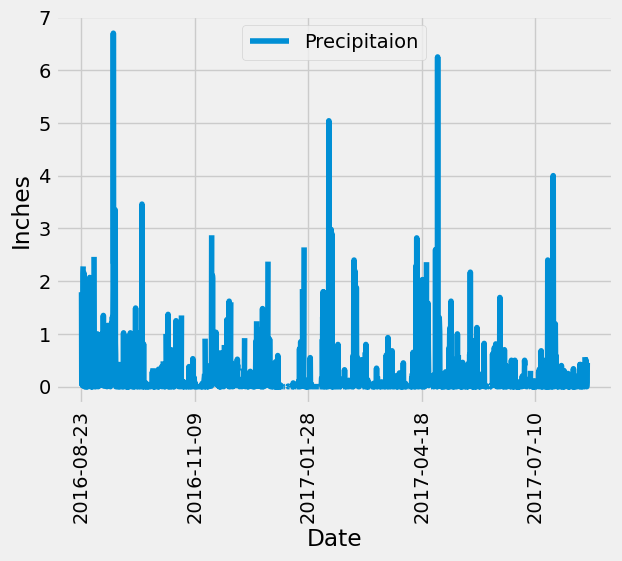

In [24]:



# # Use Pandas Plotting with Matplotlib to plot the data
# precipitation_df.plot.bar()
precipitation_df.plot(x='Date',y='Precipitaion',rot=90)
# x_axis = np.arange(0,4)
# plt.xticks(x_axis)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitaion
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.id)).all()
# List of tuples
# Because this is a tuple, it comes back in list format. In order to get just the number, you need to get the
# first row and then the first value
station_count[0][0]

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)) \
                .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
    
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = 'USC00519281'

temp_results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)) \
                            .filter(Measurement.station == most_active).all()
temp_results

[(54.0, 85.0, 71.66378066378067)]

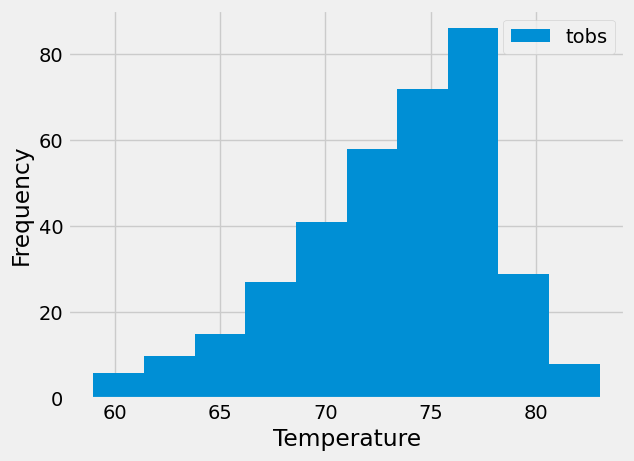

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temps = session.query(Measurement.tobs).filter(Measurement.station == most_active) \
                          .filter(Measurement.date >= year_ago).all()
year_temps_df = pd.DataFrame(year_temps, columns = ['tobs'])

year_temps_df.plot.hist()
plt.xlabel('Temperature')
plt.show()


# Close Session

In [17]:
# Close Session
session.close()